In [184]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
#1 June 28th, 2016     S&P 500: +1.78%
#2 March 31th, 2017    S&P 500: -0.23%
#3 April 7, 2017       S&P 500: -0.08%
#4 July 19, 2017       S&P 500: +0.54%
#5 Aug. 14, 2017       S&P 500: +1.00%
#6 Jan. 17, 2018       S&P 500: +0.94%
#7 Jan. 22, 2018       S&P 500: +0.81%
#8 March 8, 2018       S&P 500: +0.45%
#9 April 2, 2018       S&P 500: -2.23%
#10 April 3, 2018       S&P 500: +1.26%
#11 April 4, 2018       S&P 500: +1.16%
#12 June 15, 2018       S&P 500: -0.10%
#13 July 10, 2018       S&P 500: +0.35%
#14 Aug. 1, 2018        S&P 500: -0.10%
#15 Aug. 7, 2018        S&P 500: +0.28%
#16 Aug. 23, 2018       S&P 500: -0.17%
#17 Sept. 7, 2018       S&P 500: -0.22%
#18 Sept. 24, 2018      S&P 500: -0.35%
#19 Dec. 1, 2018        S&P 500: +1.09% 
#20 Feb. 24, 2019       S&P 500: +0.12% 
#21 May 5, 2019         S&P 500: -0.45% 
#22 May 8, 2019         S&P 500: -0.16%
#23 June 18, 2019       S&P 500: +0.97%
#24 June 29, 2019       S&P 500: +0.77% 
#25 Aug. 1, 2019        S&P 500: -0.90%
#26 Aug. 13, 2019       S&P500:   +1.5%
#27 Aug. 23, 2019       S&P 500: -0.1%
#28 Sept. 20, 2019      S&P 500: -0.53%
#29 Sept. 23, 2019      S&P 500: -0.01%
#30 Oct. 7, 2019        S&P 500: -0.46%
#31 Oct. 10, 2019       S&P 500 open: -0.066%



In [185]:
data = pd.read_csv("1.csv") 
price1=np.zeros(4779)
price2=np.zeros(4779)

In [186]:
price1=data['Price 6/27/2016'].values
price2=data['Price 6/28/2016'].values

In [187]:
pricechange=price2/price1-1 #%change 

In [188]:
pricechange.shape
x=np.arange(4779)

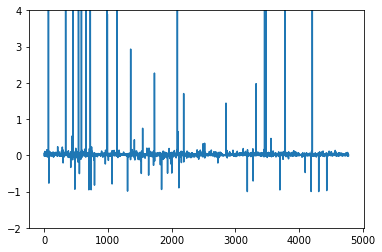

In [189]:
#1 June 28th, 2016     S&P 500: +1.78%

plt.plot(x,pricechange)
plt.ylim(-2,4)
plt.show()

In [190]:
for i in range(4779):
    if pricechange[i]>10:
        print(i,pricechange[i])
        pricechange[i]=0

337 11919.0
585 27.363636363636363
656 14.166666666666666
724 49.0
989 21.357142857142858
1144 96.13513513513513
2091 27474.0
3460 7223.999999999999
3483 2095.0
3783 311.5
4209 1086.5


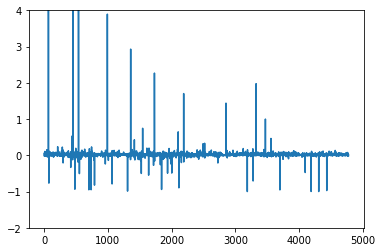

In [192]:
plt.plot(x,pricechange)
plt.ylim(-2,4)
plt.show()

In [202]:
k=110  #100 clusters 
price3index=np.zeros((4779,2))  #2*4779 table 
center=(np.random.rand(k)-0.5)*0.1  #random choose centers 
total=0


for j in range(100):     #iteration
    for i in range(4779):
        distance=np.abs(pricechange[i]-center)  #distance between each center to each point
        price3index[i]=[np.argmin(distance),np.min(distance)]   #centroid and shortest distance
    
    count=np.zeros((k,2))
    for i in range(4779):
        count[int(price3index[i][0])][0]+=1  # each cluster has how many stocks
        count[int(price3index[i][0])][1]+=pricechange[i]   #the total pricechange in each cluster
    center=count[:,1]/(count[:,0]+1e-9)   #new center 
    
for i in range(4779):
    total=total+price3index[i][1] #shortest total distance of each point to its center point
print(total)


11.599351746128585


In [210]:
cluster_distance=[]
clusters=[]
for k in range(40,150,5): #try to find the elbow point 
    price3index=np.zeros((4779,2))  #2*4779 table 
    center=(np.random.rand(k)-0.5)*0.1  #random choose centers 
    total=0
    for j in range(100):     #iteration
        for i in range(4779):
            distance=np.abs(pricechange[i]-center)  #distance between each center to each point
            price3index[i]=[np.argmin(distance),np.min(distance)]   #index and shortest distance
        count=np.zeros((k,2))
        for i in range(4779):
            count[int(price3index[i][0])][0]+=1
            count[int(price3index[i][0])][1]+=pricechange[i]
            center=count[:,1]/(count[:,0]+1e-9)

    for i in range(4779):
        total=total+price3index[i][1] #shortest total distance of each point to its center point
    print(k,total)
    cluster_distance.append(total)
    clusters.append(k)



40 16.352645097713157
45 13.830564761910782
50 13.497281509626447
55 12.920597698950846
60 12.826530092548591
65 13.188594460483616
70 12.95532543895322
75 12.409547784465586
80 11.933547091998586
85 12.712021887547127
90 11.720150965681265
95 12.294300610761546
100 11.803637487322925
105 11.734939396501819
110 11.281680219576703
115 11.228011498784317
120 11.097163247796683
125 11.40576076063971
130 11.621312544464184
135 11.041820008535149
140 11.01722346570083
145 10.799015218447105


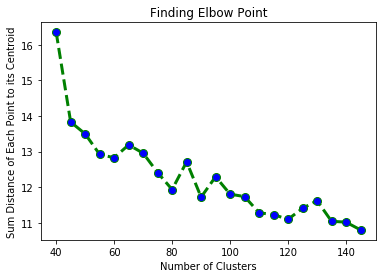

In [211]:
x=clusters
y=cluster_distance
plt.plot(x, y,color='green', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=8) 
# naming the x axis 
plt.xlabel('Number of Clusters') 
# naming the y axis 
plt.ylabel('Sum Distance of Each Point to its Centroid') 
  
# giving a title to my graph 
plt.title('Finding Elbow Point') 
  
# function to show the plot 
plt.show()

In [205]:
cluster_distance=[]
clusters=[]
for k in range(40,150,5): #try to find the elbow point 
    price3index=np.zeros((4779,2))  #2*4779 table 
    center=(np.random.rand(k)-0.5)*0.1  #random choose centers 
    total=0
    for j in range(100):     #iteration
        for i in range(4779):
            distance=np.abs(pricechange[i]-center)  #distance between each center to each point
            price3index[i]=[np.argmin(distance),np.min(distance)]   #index and shortest distance
        count=np.zeros((k,2))
        for i in range(4779):
            count[int(price3index[i][0])][0]+=1
            count[int(price3index[i][0])][1]+=pricechange[i]
            center=count[:,1]/(count[:,0]+1e-9)

    for i in range(4779):
        total=total+price3index[i][1] #shortest total distance of each point to its center point
    print(k,total)
    cluster_distance.append(total)
    clusters.append(k)

40 14.823412827856584
45 15.688744626851532
50 14.430618583073953
55 14.568484329368275
60 13.049122767454545
65 12.853073676473546
70 13.033667774943007
75 13.072403341650736
80 12.686060976132724
85 12.159805709514146
90 11.983386072156758
95 11.543574598350599
100 11.560572111324719
105 11.468433649431349
110 11.555616327139374
115 11.251965766916044
120 11.268924527760598
125 11.064332957813866
130 10.975651314287049
135 11.262144834176986
140 10.77380889604661
145 10.904358485945576


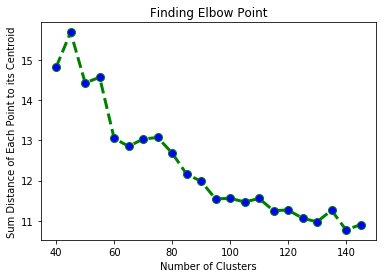

In [206]:
x=clusters
y=cluster_distance
plt.plot(x, y,color='green', linestyle='dashed', linewidth = 3, 
         marker='o', markerfacecolor='blue', markersize=8) 
plt.ylabel('cluster')
# naming the x axis 
plt.xlabel('Number of Clusters') 
# naming the y axis 
plt.ylabel('Sum Distance of Each Point to its Centroid') 
  
# giving a title to my graph 
plt.title('Finding Elbow Point') 
  
# function to show the plot 
plt.show()
